Алгоритм шумоподавления основан на методе, называемом «spectral gating», который является разновидностью Noise Gate(https://en.wikipedia.org/wiki/Noise_gate). Он работает путем вычисления спектрограммы сигнала (и, по желанию, шумового сигнала) и оценки порога шума (или строба) для каждой частотной полосы этого сигнала/шума. Этот порог используется для вычисления маски, которая отсекает шум ниже изменяющегося по частоте порога.

In [6]:
from pathlib import Path

def load_and_save(path_to_data: Path | str, path_to_save: Path | str) -> tuple[list[Path], Path]:
    folder = Path(path_to_data).resolve()
    folder_to_save = Path(path_to_save).resolve()
    folder_to_save.mkdir(parents=True, exist_ok=True)

    paths = list(folder.rglob("*.wav"))

    for file_path in paths:
        relative_path = file_path.relative_to(folder)
        target_path = folder_to_save / relative_path
        target_path.parent.mkdir(parents=True, exist_ok=True)

    return paths, folder_to_save

files, folder = load_and_save("../recordings", "../results/")


In [8]:
import noisereduce as nr
import soundfile as sf
import librosa
from pathlib import Path

def process_files(files: list[Path], path_to_data: Path | str, path_to_save: Path | str) -> None:
    path_to_data = Path(path_to_data).resolve()
    path_to_save = Path(path_to_save).resolve()

    for file in files:
        y, sr = librosa.load(file, sr=None)
        # TODO - нужно сделать доступным применение разных функций-обработчиков звука через параметр
        reduced_noise = nr.reduce_noise(y=y, sr=sr, stationary=False)
        relative_path = file.relative_to(path_to_data)
        output_path = path_to_save / relative_path
        sf.write(output_path, reduced_noise, sr)
        print(f"Файл \"{file.name}\" успешно обработан и сохранён в {output_path}")
process_files(files, "../recordings", "../results/")


Файл "2025-02-23 18.11.09.wav" успешно обработан и сохранён в /home/goyda/PycharmProjects/Noisereducing-/results/3/2025-02-23 18.11.09.wav
Файл "2025-02-23 18.13.51.wav" успешно обработан и сохранён в /home/goyda/PycharmProjects/Noisereducing-/results/3/2025-02-23 18.13.51.wav
Файл "2025-02-24 17.54.25.wav" успешно обработан и сохранён в /home/goyda/PycharmProjects/Noisereducing-/results/3/2025-02-24 17.54.25.wav
Файл "2025-02-24 18.00.38.wav" успешно обработан и сохранён в /home/goyda/PycharmProjects/Noisereducing-/results/3/2025-02-24 18.00.38.wav
Файл "2025-02-24 18.36.40.wav" успешно обработан и сохранён в /home/goyda/PycharmProjects/Noisereducing-/results/3/2025-02-24 18.36.40.wav
Файл "2025-02-24 19.36.50.wav" успешно обработан и сохранён в /home/goyda/PycharmProjects/Noisereducing-/results/3/2025-02-24 19.36.50.wav
Файл "2025-02-24 21.04.54.wav" успешно обработан и сохранён в /home/goyda/PycharmProjects/Noisereducing-/results/3/2025-02-24 21.04.54.wav
Файл "2025-02-24 21.05.45.w

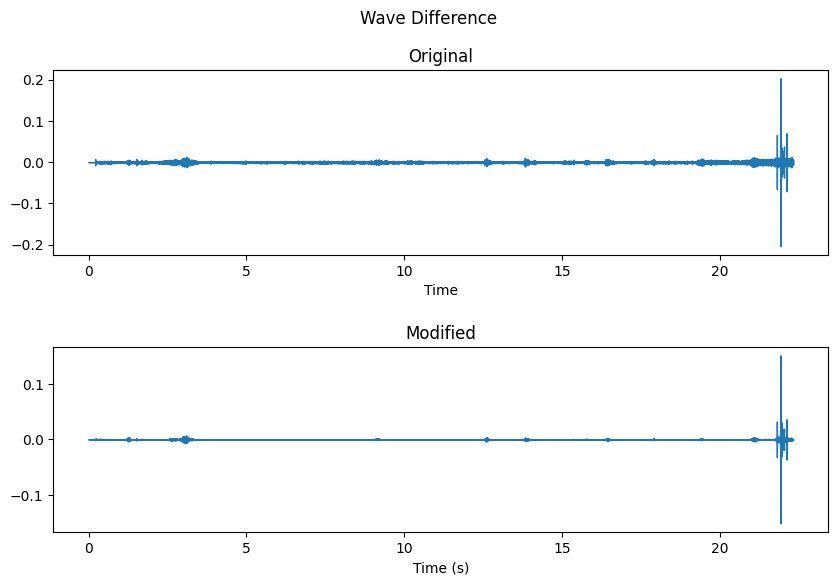

In [10]:
import librosa.display

def showDifference_wave(file1, file2):
    y, sr = librosa.load(file1, sr=None)
    y1, sr1 = librosa.load(file2, sr=None)
    fig, axs = plt.subplots(2, figsize=(10, 6), gridspec_kw={'hspace': 0.5})
    fig.suptitle('Wave Difference')
    librosa.display.waveshow(y, sr=sr, ax=axs[0])
    axs[0].set_title("Original")
    librosa.display.waveshow(y1, sr=sr1, ax=axs[1])
    axs[1].set_title("Modified")
    plt.xlabel("Time (s)")
    plt.show()

showDifference_wave(
    folder / "2025-02-24 21.10.04.wav",
    folder_to_save / "2025-02-24 21.10.04.wav"
)

/tmp/ipykernel_10622/918716198.py:10: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
/tmp/ipykernel_10622/918716198.py:13: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D1 = librosa.amplitude_to_db(librosa.stft(y1), ref=np.max)


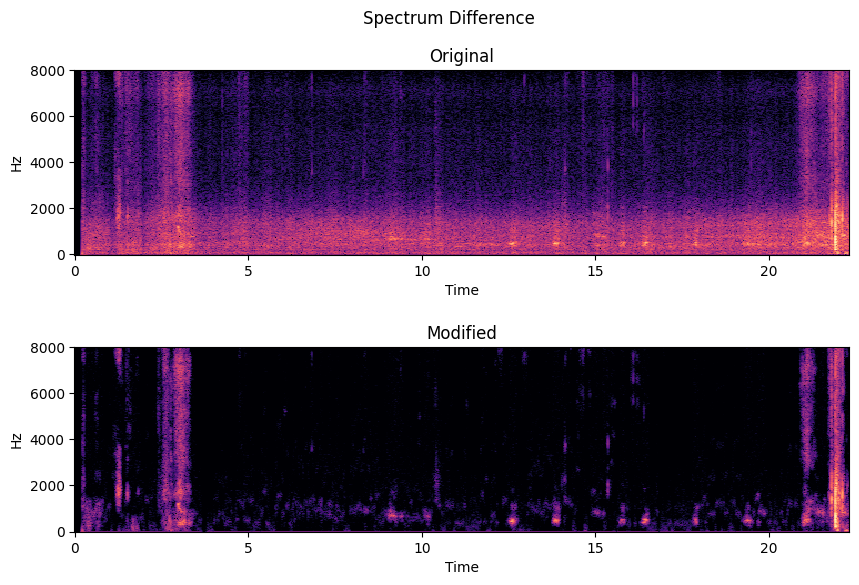

In [11]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
def showDifference_spectrum(file1, file2):
    y, sr = librosa.load(file1, sr=None)
    y1, sr1 = librosa.load(file2, sr=None)
    fig, axs = plt.subplots(2, figsize=(10, 6), gridspec_kw={'hspace': 0.5})
    fig.suptitle('Spectrum Difference')
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    axs[0].set_title("Original")
    librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="linear", ax=axs[0])
    D1 = librosa.amplitude_to_db(librosa.stft(y1), ref=np.max)
    axs[1].set_title("Modified")
    librosa.display.specshow(D1, sr=sr1, x_axis="time", y_axis="linear", ax=axs[1])
    plt.show()

showDifference_spectrum(
    folder / "2025-02-24 21.10.04.wav",
    folder_to_save / "2025-02-24 21.10.04.wav"
)
